# <span style="color:#1B4F72">Forecasting Client Retention for Interconnect Telecom</span>

### Introduction (English)

Customer retention is one of the most critical challenges for the telecommunications industry. With increasing competition and low switching costs, customers can easily move to other providers, leading to significant revenue losses. Identifying potential churners before they leave allows "Interconnect Telecom" to take proactive measures, such as offering promotional codes, enhancing customer service, or providing special plan options.  

This project focuses on **<span style="color:#16A085">predicting customer churn</span>** using historical customer data, including contract details, personal data, internet and phone service subscriptions. By leveraging machine learning models, the goal is to:  

1. **<span style="color:#16A085">Forecast customer churn probability</span>** with high accuracy.  
2. **<span style="color:#16A085">Identify key drivers of churn</span>** (e.g., contract type, monthly charges, service features).  
3. **<span style="color:#16A085">Provide actionable insights</span>** to help the company reduce churn and improve customer loyalty.  

The outcome of this project will not only improve predictive capabilities but also enable the "Interconnect Telecom" to design effective **<span style="color:#16A085">customer retention strategies</span>**, ultimately leading to reduced revenue loss and stronger long-term relationships with clients.  

---

### 專案簡介 (繁體中文)

在電信產業中，**<span style="color:#16A085">顧客留存</span>** 一直是最重要的挑戰之一。隨著市場競爭日益激烈與轉換成本降低，客戶往往能輕易轉向其他服務供應商，這將造成企業的重大營收損失。若能提前辨識可能流失的客戶，Interconnect電信業者 便能主動採取措施，例如提供個人化優惠、提升客服品質，或調整合約條件，以降低流失率。  

本專案的目標是利用 **<span style="color:#16A085">歷史客戶資料**</span>（包含合約資訊、個人特徵、網路與電話服務等），透過機器學習模型進行 **<span style="color:#16A085">客戶流失預測</span>**。專案的核心目標包括：  

1. **<span style="color:#16A085">準確預測客戶流失機率</span>**，協助企業掌握風險。
2. **<span style="color:#16A085">找出流失的關鍵因素</span>**（例如合約類型、月費金額、服務內容等）。  
3. **<span style="color:#16A085">提供可行性建議</span>**，協助電信公司制定更有效的客戶留存策略。  

透過此專案，企業不僅能提升流失預測的能力，更能藉由數據驅動的洞察，優化行銷與客服策略，進而降低營收損失並加強與顧客的長期關係。  

## <span style="color:#1B4F72">1. Data Understanding / 資料理解</span> 
- Import datasets (`contract.csv`, `internet.csv`, `personal.csv`, `phone.csv`)  
- Merge on `customerID` to create a unified customer-level dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Datasets
contract = pd.read_csv('/datasets/contract.csv')
personal = pd.read_csv('/datasets/personal.csv')
internet = pd.read_csv('/datasets/internet.csv')
phone    = pd.read_csv('/datasets/phone.csv')

In [2]:
dfs = {'contract':contract, 'personal':personal, 'internet':internet, 'phone':phone}

for name, df in dfs.items():
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    
    print(f"---{name.upper()}---\n")
    print(df.head())
    print()
    print(df.info())

---CONTRACT---

   customerid   begindate              enddate            type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  paperlessbilling              paymentmethod  monthlycharges totalcharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column       

#### Merge all files into one

In [3]:
for df in [contract, personal, internet, phone]:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

merged = contract.merge(personal, on='customerid', how='left')\
                 .merge(phone,    on='customerid', how='left')


print(merged.shape)
print(merged.head())

(7043, 13)
   customerid   begindate              enddate            type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  paperlessbilling              paymentmethod  monthlycharges totalcharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  seniorcitizen partner dependents multiplelines  
0  Female              0     Yes         No           NaN  
1  

In [4]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   seniorcitizen     7043 non-null   int64  
 10  partner           7043 non-null   object 
 11  dependents        7043 non-null   object 
 12  multiplelines     6361 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 770.3+ KB


In [5]:
merged["is_active"] = merged["enddate"].eq("No")   # True = Active customers.

print(merged[["customerid", "enddate", "is_active"]].head())

   customerid              enddate  is_active
0  7590-VHVEG                   No       True
1  5575-GNVDE                   No       True
2  3668-QPYBK  2019-12-01 00:00:00      False
3  7795-CFOCW                   No       True
4  9237-HQITU  2019-11-01 00:00:00      False


## <span style="color:#1B4F72">2. Data Preprocessing / 資料前處理</span> 
- Handle missing values:
  - Drop or impute depending on feature type

In [6]:
print("Total duplicates:", merged.duplicated().sum())
print("Duplicate customerid:", merged["customerid"].duplicated().sum())
duplicates = merged[merged.duplicated(subset=["customerid"], keep=False)]
print(duplicates.head())

Total duplicates: 0
Duplicate customerid: 0
Empty DataFrame
Columns: [customerid, begindate, enddate, type, paperlessbilling, paymentmethod, monthlycharges, totalcharges, gender, seniorcitizen, partner, dependents, multiplelines, is_active]
Index: []


In [7]:
print(merged.isnull().sum())
print('------------------------------------------------')
print(merged.isnull().mean() * 100)
print('------------------------------------------------')
print(merged.isnull().sum()[merged.isnull().sum() > 0])

customerid            0
begindate             0
enddate               0
type                  0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          0
gender                0
seniorcitizen         0
partner               0
dependents            0
multiplelines       682
is_active             0
dtype: int64
------------------------------------------------
customerid          0.000000
begindate           0.000000
enddate             0.000000
type                0.000000
paperlessbilling    0.000000
paymentmethod       0.000000
monthlycharges      0.000000
totalcharges        0.000000
gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
multiplelines       9.683374
is_active           0.000000
dtype: float64
------------------------------------------------
multiplelines    682
dtype: int64


In [8]:
print("Dataset shape:", merged.shape)
print("Total missing values:", merged.isnull().sum().sum())
print("Total duplicates:", merged.duplicated().sum())

Dataset shape: (7043, 14)
Total missing values: 682
Total duplicates: 0


In [9]:
merged["is_active"] = merged["enddate"].isna()
merged["multiplelines"] = merged["multiplelines"].fillna("Unknown")

print(merged.isnull().sum())

customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
gender              0
seniorcitizen       0
partner             0
dependents          0
multiplelines       0
is_active           0
dtype: int64


#### Create target column: is_churn

In [10]:
merged['enddate'] = merged['enddate'].astype(str)
merged['is_churn'] = (merged['enddate'] != 'No').astype(int)

id_cols = ['customerid']
merged.drop(columns=[c for c in id_cols if c in merged.columns], inplace=True)

print(merged['is_churn'].value_counts(normalize=True))

0    0.73463
1    0.26537
Name: is_churn, dtype: float64


## <span style="color:#1B4F72">3. Exploratory Data Analysis (EDA) / 探索性資料分析</span> 
- Summary statistics for all features  
- Visualizations:
  - Distribution of target variable (`Churn`)  
  - Correlation heatmap for numerical features  
  - Boxplots/Histograms for continuous variables vs. `Churn`  
  - Bar plots for categorical variables vs. `Churn`  
- Identify potential data leakage features  

#### Plot churn distribution

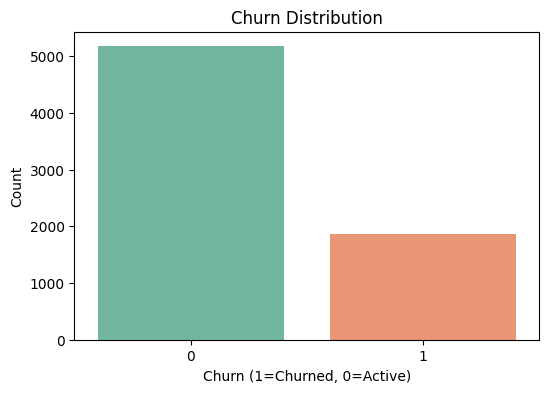

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged, x="is_churn", palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn (1=Churned, 0=Active)")
plt.ylabel("Count")
plt.show()

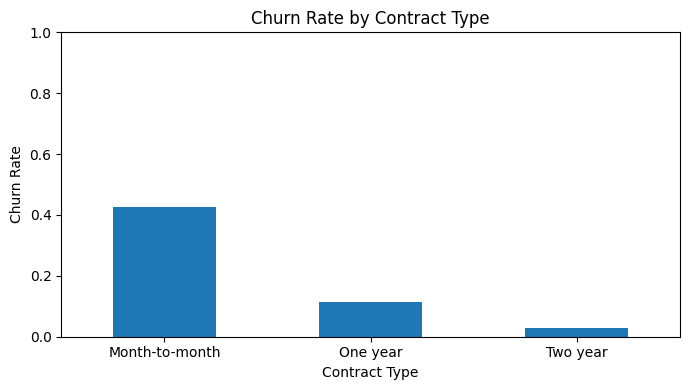

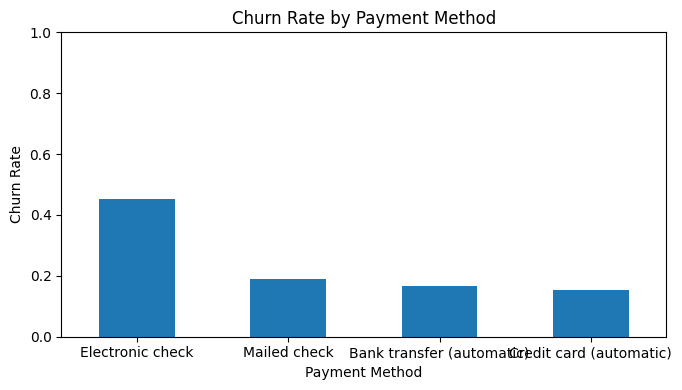

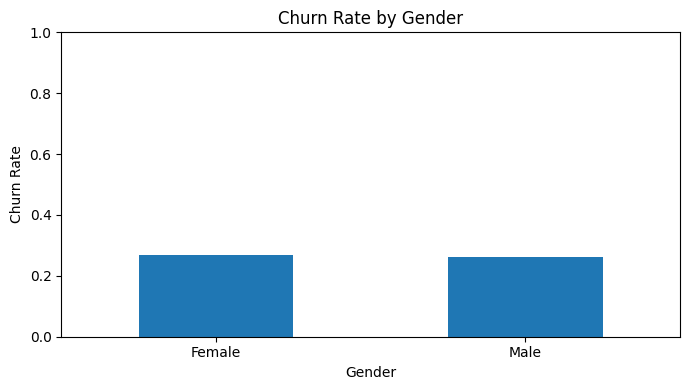

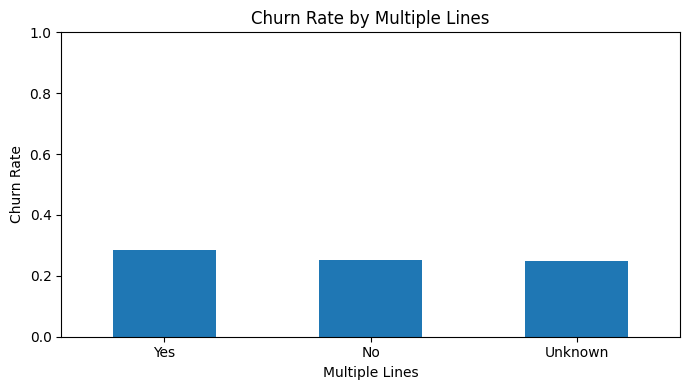

In [12]:
# Helper to plot churn rate bar chart for a categorical column
def plot_churn_rate(df, col, title, xlabel):
    rate = df.groupby(col)["is_churn"].mean().sort_values(ascending=False)
    plt.figure(figsize=(7,4))
    rate.plot(kind="bar")
    plt.ylim(0, 1)
    plt.ylabel("Churn Rate")
    plt.xlabel(xlabel)
    plt.xticks(rotation=0)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 4) Contract type vs churn
plot_churn_rate(merged, "type", "Churn Rate by Contract Type", "Contract Type")

# 5) Payment method vs churn
plot_churn_rate(merged, "paymentmethod", "Churn Rate by Payment Method", "Payment Method")

# 6) Gender vs churn
plot_churn_rate(merged, "gender", "Churn Rate by Gender", "Gender")

# 7) Multiple lines vs churn (fill missing as 'Unknown')
merged["multiplelines"] = merged["multiplelines"].fillna("Unknown")
plot_churn_rate(merged, "multiplelines", "Churn Rate by Multiple Lines", "Multiple Lines")

# <span style="color:#1B4F72">Churn Analysis Report</span>

#### 1. Contract Type
- **Month-to-month**: Highest churn rate, above **40%**.  
- **One year**: Moderate churn rate, around **10%**.  
- **Two year**: Lowest churn rate, close to **3–4%**.  

 *Interpretation*: Short-term (month-to-month) customers are the most vulnerable and highly prone to churn. Long-term contracts significantly reduce churn by locking customers in and increasing loyalty.  

---

#### 2. Payment Method
- **Electronic check**: Very high churn rate, almost **45%**.  
- **Mailed check, Bank transfer (automatic), Credit card (automatic)**: Churn rate around **15–20%**.  

 *Interpretation*: Customers paying via electronic check churn much more frequently. Automatic payments (bank transfer, credit card) help lower churn, likely due to convenience and stronger binding.  

---

#### 3. Gender
- Male and female churn rates are almost identical (**~26–27%**).  

*Interpretation*: Gender is not a meaningful predictor of churn.  

---

#### 4. Multiple Phone Lines
- **Yes**: Churn rate around **28–29%**.  
- **No**: Churn rate around **25–26%**.  
- **Unknown**: Similar to "No," about **25–26%**.  

 *Interpretation*: Having multiple lines shows only a slight increase in churn risk, but the effect is relatively minor compared to contract type or payment method.  

---

#### Key Insights
1. **Contract type** is the strongest churn driver — month-to-month customers are at the highest risk.  
2. **Payment method** matters — electronic check users churn much more.  
3. **Gender** has little to no impact on churn.  
4. **Multiple lines** have only a small effect on churn likelihood.  

---
# <span style="color:#1B4F72">客戶流失分析報告</span>

#### 1. 合約類型 
- **月繳**：流失率最高，超過 **40%**。  
- **一年合約**：中等流失率，約 **10%**。  
- **兩年合約**：流失率最低，接近 **3–4%**。  

*解讀*：短期（月繳）客戶最脆弱、最容易流失。長期合約能顯著降低流失率，因為它能綁住客戶並提升忠誠度。  

---

#### 2. 支付方式
- **電子支票**：流失率非常高，接近 **45%**。  
- **郵寄支票、銀行自動轉帳、信用卡自動扣款**：流失率約 **15–20%**。  

 *解讀*：使用電子支票付款的客戶流失率明顯較高。自動付款（銀行轉帳、信用卡）則能降低流失，可能因為便利性與綁定性更強。  

---

#### 3. 性別 
- 男性與女性的流失率幾乎相同（約 **26–27%**）。  

*解讀*：性別不是影響流失的重要因子。  

---

#### 4. 多重電話線
- **有**：流失率約 **28–29%**。  
- **沒有**：流失率約 **25–26%**。  
- **未知**：與「沒有」相似，約 **25–26%**。  

 *解讀*：擁有多條電話線的客戶流失率略高，但差異不大，影響程度遠小於合約或付款方式。  

---

### 關鍵洞察
1. **合約類型** 是最強的流失驅動因子 —— 月繳客戶風險最高。  
2. **支付方式** 也很重要 —— 使用電子支票的客戶流失率顯著更高。  
3. **性別** 幾乎沒有影響。  
4. **多重電話線** 僅有些微影響。  


#### Work Plan :

1. **Perform Exploratory Data Analysis (EDA)**  
   - Conduct an in-depth analysis of the datasets to identify key trends, distributions, and potential data quality issues.  
   - Visualize churn patterns across demographic, contract, and service-related features.  

2. **Preprocess and Merge Datasets**  
   - Standardize column names and data types.  
   - Merge multiple datasets on `customerid`.  
   - Handle missing values, outliers, and categorical encoding to ensure model readiness.  

3. **Build and Train Classification Models**  
   - Start with baseline models (e.g., Logistic Regression) for interpretability.  
   - Experiment with advanced models (e.g., LightGBM) to capture nonlinear relationships.  
   - Perform hyperparameter tuning for optimal performance.  

4. **Evaluate Model Performance**  
   - Use **AUC-ROC** as the primary metric for churn prediction effectiveness.  
   - Track **Accuracy, Precision, Recall, and F1-score** to ensure balanced performance across classes.  
   - Validate results with cross-validation to ensure generalizability.  

5. **Generate Business Insights and Recommendations**  
   - Translate model findings into actionable strategies (e.g., retention programs for high-risk groups).  
   - Highlight the most influential churn drivers to support decision-making.  

6. **Set Success Criteria**  
   - Aim to achieve an **AUC-ROC ≥ 0.85**.  
   - Meeting or exceeding this benchmark will maximize sprint points and demonstrate project success.  


#### 工作計畫

1. **進行探索性資料分析 (EDA)**  
   - 深入分析資料集，找出關鍵趨勢、分布，以及潛在的資料品質問題。  
   - 視覺化不同人口統計、合約與服務特徵下的流失模式。  

2. **資料前處理與合併**  
   - 標準化欄位名稱與資料型態。  
   - 依 `customerid` 合併多個資料集。  
   - 處理遺漏值、異常值，並完成類別編碼，確保能進行建模。  

3. **建立並訓練分類模型**  
   - 以邏輯迴歸 (Logistic Regression) 作為基準模型，強調可解釋性。  
   - 嘗試進階模型 (如 LightGBM) 捕捉非線性關係。  
   - 進行超參數調校以提升效能。  

4. **模型效能評估**  
   - 以 **AUC-ROC** 作為主要指標，用於衡量流失預測的準確性。  
   - 追蹤 **準確率 (Accuracy)、精確率 (Precision)、召回率 (Recall)、F1-score**，確保模型在各類別的平衡表現。  
   - 透過交叉驗證 (Cross-validation) 驗證結果的穩健性。  

5. **產出商業洞察與建議**  
   - 將模型結果轉化為可執行的策略（例如針對高風險群體設計留存方案）。  
   - 強調最具影響力的流失因子，支持決策制定。  

6. **設定成功標準**  
   - 目標為達成 **AUC-ROC ≥ 0.85**。  
   - 達成或超越此基準將獲得最高 sprint 分數，並展現專案成功。  

## <span style="color:#1B4F72">4. Feature Engineering / 特徵工程</span> 

In [13]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve

In [14]:
# Check data types in merged dataframe

print("Data types in merged dataframe:")
print(merged.dtypes)
print("\nColumns with datetime:")

Data types in merged dataframe:
begindate            object
enddate              object
type                 object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
gender               object
seniorcitizen         int64
partner              object
dependents           object
multiplelines        object
is_active              bool
is_churn              int64
dtype: object

Columns with datetime:


In [15]:
merged['begindate'] = pd.to_datetime(merged['begindate'], errors='coerce')
merged['begin_year'] = merged['begindate'].dt.year
merged['begin_month'] = merged['begindate'].dt.month
merged['begin_day_of_week'] = merged['begindate'].dt.dayofweek  # 0=Monday, 6=Sunday
merged['begin_season'] = merged['begindate'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

merged = pd.get_dummies(merged, columns=['begin_season'], drop_first=True)

print("Shape after cleaning:", merged.shape)
print("Data types:", merged.dtypes.value_counts())

Shape after cleaning: (7043, 20)
Data types: object            9
int64             5
uint8             3
bool              1
datetime64[ns]    1
float64           1
dtype: int64


In [16]:
# Create quarters as categories
merged['begin_quarter'] = merged['begindate'].dt.to_period('Q').astype(str)

def get_business_period(date):
    if date.year <= 2017:
        return 'Early_Period'
    elif date.year <= 2019:
        return 'Growth_Period'  
    else:
        return 'Recent_Period'

merged['business_period'] = merged['begindate'].apply(get_business_period)

In [17]:
datetime_cols = merged.select_dtypes(include=['datetime64']).columns.tolist()
print("Datetime columns:", datetime_cols)

Datetime columns: ['begindate']


In [18]:
merged['totalcharges'] = pd.to_numeric(merged['totalcharges'], errors='coerce')
merged['totalcharges'] = merged['totalcharges'].fillna(merged['totalcharges'].median())

# Remove data leakage columns
columns_to_drop = ['begindate', 'enddate', 'is_churn', 'begin_quarter']
X = merged.drop(columns=columns_to_drop)
y = merged["is_churn"]


categorical_cols = ['type', 'paperlessbilling', 'paymentmethod', 
                   'gender', 'partner', 'dependents', 'multiplelines', 
                   'business_period'] 

# Apply one-hot encoding to all categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_sample, _, y_sample, _ = train_test_split(
    X_encoded, y, train_size=0.2, random_state=42, stratify=y
)

rf_sample = RandomForestClassifier(n_estimators=50, random_state=42)
rf_sample.fit(X_sample, y_sample)

# Get feature importance
feature_importance = pd.Series(
    rf_sample.feature_importances_, 
    index=X_encoded.columns
).sort_values(ascending=False)


print("Top 15 Most Important Features:")
print(feature_importance.head(15))

Top 15 Most Important Features:
totalcharges                      0.192855
monthlycharges                    0.177792
begin_month                       0.081105
begin_day_of_week                 0.062313
paymentmethod_Electronic check    0.057976
begin_year                        0.057252
business_period_Growth_Period     0.049216
type_Two year                     0.041013
paperlessbilling_Yes              0.033743
type_One year                     0.029219
gender_Male                       0.027110
partner_Yes                       0.023859
seniorcitizen                     0.023318
dependents_Yes                    0.022589
multiplelines_Yes                 0.020674
dtype: float64


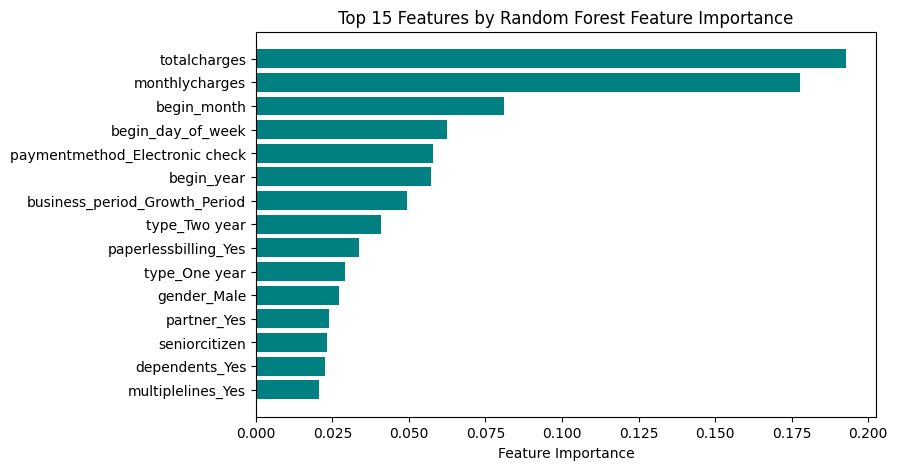

In [19]:
plt.figure(figsize=(8,5))
top15 = feature_importance.head(15)
plt.barh(top15.index, top15.values, color="teal")  # Use .index and .values
plt.gca().invert_yaxis()
plt.title("Top 15 Features by Random Forest Feature Importance")
plt.xlabel("Feature Importance")
plt.show()

## <span style="color:#1B4F72">Random Forest Feature Importance / 隨機森林特徵重要性</span>

#### Top 15 Features / 前 15 個重要特徵
1. **totalcharges**  
2. **monthlycharges**  
3. **begin_month**  
4. **begin_day_of_week**  
5. **paymentmethod_Electronic check**  
6. **begin_year**  
7. **business_period_Growth_Period**  
8. **type_Two year**  
9. **paperlessbilling_Yes**  
10. **type_One year**  
11. **gender_Male**  
12. **partner_Yes**  
13. **seniorcitizen**  
14. **dependents_Yes**  
15. **multiplelines_Yes**  

---

#### Interpretation / 解讀
- **totalcharges & monthlycharges (總收費 & 月收費)**  
  - 兩者是影響客戶流失預測最強的特徵。
  - These are the strongest predictors of customer churn
  - 收費相關變數反映了客戶價值與消費模式，與是否流失高度相關。
  - Billing-related variables reflect customer value and spending patterns, which are highly correlated with churn behavior.  

- **begin_month, begin_day_of_week, begin_year (入網時間相關特徵)**  
  - 反映出客戶何時加入服務，可能與合約週期、促銷活動有關。
  - These capture when the customer joined the service, which may be associated with contract cycles or promotional campaigns. 

- **paymentmethod_Electronic check (付款方式：電子支票)**  
  - 支付方式對流失有顯著影響，電子支票使用者流失率可能較高。
  - Payment method significantly impacts churn, with electronic check users showing a higher likelihood of churn. 

- **contract type (type_Two year, type_One year)**  
  - 合約長度明顯影響流失率，長期合約用戶通常流失率較低。
  - Contract length strongly affects churn—customers with longer-term contracts usually have lower churn rates.  

- **demographics (gender, partner, seniorcitizen, dependents)**  
  - 雖然影響力較小，但仍提供額外的行為解釋。
  - Although their influence is weaker, they still provide additional behavioral insights. 

---

#### Conclusion / 結論
- **財務相關特徵 (totalcharges, monthlycharges)** 是模型最重要的驅動因子。
- **Financial features (totalcharges, monthlycharges)** are the most important drivers of churn prediction.
- **合約長度與付款方式** 也顯著影響客戶流失。
- **Contract length and payment method** also have a strong impact on churn.
- **人口統計特徵 (年齡、性別、家庭狀況)** 影響相對較弱，但可作為輔助解釋。
- **Demographic features (age, gender, household situation)** are relatively weaker but useful for supplementary interpretation.
- 總體來看，Random Forest 提供了清晰的變數貢獻排序，幫助我們了解哪些特徵最值得在客戶留存策略中關注。
- Overall, Random Forest provides a clear ranking of feature contributions, helping us identify which features are most valuable for designing customer retention strategies.  

## <span style="color:#1B4F72">5. Modeling / 建模</span> 
- Split dataset:
  - Train (70%), Validation (15%), Test (15%)  
- Baseline model:
  - Logistic Regression  
- Advanced models:
  - Gradient Boosting (XGBoost)  
- Compare model performance  

In [20]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# Then split temp into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_valid.shape, y_valid.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (4930, 23) (4930,)
Validation shape: (1056, 23) (1056,)
Test shape: (1057, 23) (1057,)


In [21]:
# Scale the features (使用 5-fold 交叉驗證，更穩健的評估)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Now train the model
model = LogisticRegression(max_iter=1000)
scoring = {
    "accuracy": "accuracy",
    "roc_auc": "roc_auc"
}

results = cross_validate(
    model,
    X_scaled,
    y,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("Accuracy (CV):", results["test_accuracy"].mean())
print("ROC-AUC (CV):", results["test_roc_auc"].mean())

Accuracy (CV): 0.802925188721853
ROC-AUC (CV): 0.8460347415143277


## <span style="color:#1B4F72">6. Model Evaluation / 模型評估</span>
  - Evaluation metrics:
  - Accuracy  
  - Precision, Recall, F1-score  
  - ROC-AUC  
- Plot evaluation:
  - ROC Curve  
  - Confusion Matrix  
  - Precision-Recall Curve  
- Select the best-performing model based on ROC-AUC and business requirements (e.g., higher recall for reducing customer churn risk)

In [22]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, f1_score

In [23]:
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Model")
print("AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Model
AUC-ROC: 0.9085785302857982
Accuracy: 0.8732261116367077


## <span style="color:#1B4F72">Initial XGBoost Model Evaluation / XGBoost 初步模型評估</span>

### Conclusion / 結論
- The XGBoost model shows **high discriminative power (AUC ≈ 0.91)** and **solid accuracy (≈ 87%)**.  
- 模型具有 **很高的判別能力 (AUC ≈ 0.91)**，同時 **準確率也達到 87%**，代表它對客戶流失預測有不錯的效果。

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
}

# Use RandomizedSearchCV for efficiency
xgb_random = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid,
    n_iter=8,
    cv=2,
    scoring='roc_auc',
    random_state=42
)

# Fit on training data
X_sample = X_train.sample(frac=0.2, random_state=42)
y_sample = y_train[X_sample.index]

xgb_random.fit(X_sample, y_sample)
print("Best parameters:", xgb_random.best_params_)

In [ ]:
# Train again with the best parameters.
model_xgb_final = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
model_xgb_final.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb_final.predict(X_test)
y_proba_xgb = model_xgb_final.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Model_Final")
print("AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

## <span style="color:#1B4F72">XGBoost Model (Final) Evaluation / XGBoost 最終模型評估 </span>

### Conclusion / 結論
- Compared with the previous run (AUC ≈ 0.91, Accuracy ≈ 88%), this tuned model trades some AUC for a simpler structure (shallower depth and fewer trees).  
- 與前一次 (AUC ≈ 0.91, Accuracy ≈ 88%) 相比，這個調參後的模型雖然效能略降，但結構更簡單（樹更淺、迭代次數更少），在避免過擬合與計算效率上更有優勢。  

In [ ]:
# Get probabilities on validation set
y_proba_val = model_xgb.predict_proba(X_valid)[:, 1]

# Try different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_proba_val >= threshold).astype(int)
    f1 = f1_score(y_valid, y_pred_thresh)
    f1_scores.append(f1)

# Find best threshold
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1 score: {max(f1_scores):.3f}")

# Plot threshold vs F1 score
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Classification Threshold')
plt.legend()
plt.show()

## <span style="color:#1B4F72">Threshold Tuning with F1 Score / 使用 F1 分數調整分類閾值 </span>

### Why Threshold Tuning? / 為什麼要調整閾值？
- By default, classifiers use **0.5** as the probability threshold to classify 0/1.  
- 預設分類器會使用 **0.5** 作為機率閾值來判斷 0/1。  
- However, this may not maximize the performance metric we care about (e.g., **F1-score** for imbalanced data).  
- 但這未必能最大化我們關心的評估指標（例如 **F1 分數**，特別在數據不平衡時）。  

---

### Results / 結果
- **Best threshold 最佳閾值**: **0.45**  
- **Best F1 score 最佳 F1 分數**: **0.757**  

---

### Visualization / 視覺化
- The curve shows how F1-score changes with different thresholds.  
- 曲線顯示 F1 分數隨著不同閾值的變化。  
- The **red dashed line** marks the best threshold (0.45).  
- **紅色虛線** 標記了最佳閾值 (0.45)。  

---

### Conclusion / 結論
- Using a threshold of **0.45** instead of the default 0.5 improves the model’s balance between precision and recall.  
- 使用 **0.45** 而不是預設的 0.5，能讓模型在精確率與召回率之間取得更佳平衡。  
- This adjustment increases the **F1-score to 0.757**, meaning better overall performance on imbalanced churn prediction.  
- 此調整將 **F1 分數提升至 0.757**，代表模型在不平衡的流失預測任務上有更佳的整體表現。  

In [ ]:
# Train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# predictions
proba_log = log_reg.predict_proba(X_test)[:, 1]

# Compare original XGBoost vs tuned XGBoost
proba_xgb_original = model_xgb.predict_proba(X_test)[:, 1]
proba_xgb_tuned = model_xgb_final.predict_proba(X_test)[:, 1]


In [ ]:
# Compare Precision–Recall Curves: Logistic Regression vs XGBoost
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1) Predict probabilities for the positive class
proba_log = log_reg.predict_proba(X_test)[:, 1]
proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# 2) Compute PR points and Average Precision
prec_log, rec_log, _ = precision_recall_curve(y_test, proba_log)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, proba_xgb)

ap_log = average_precision_score(y_test, proba_log)
ap_xgb = average_precision_score(y_test, proba_xgb)

# 3) Plot
plt.figure(figsize=(8, 6))
plt.plot(rec_log, prec_log, label=f'Logistic Regression (AP = {ap_log:.3f})')
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost (AP = {ap_xgb:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve: Logistic Regression vs XGBoost')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average Precision — Logistic Regression: {ap_log:.4f}")
print(f"Average Precision — XGBoost:            {ap_xgb:.4f}")

## <span style="color:#1B4F72">Precision-Recall Curve Comparison / Precision-Recall 曲線比較 </span>
### Models Compared / 比較的模型
- **<span style="color:#16A085">
Logistic Regression</span>**  
- **<span style="color:#16A085">
XGBoost</span>**

---

### Results / 結果
- **<span style="color:#16A085">
Average Precision (AP) 平均精確率</span>** 
  - Logistic Regression: **<span style="color:#E74C3C">0.620</span>**  
  - XGBoost: **<span style="color:#E74C3C">0.847</span>**  

---

### Curve Interpretation / 曲線解讀
- **<span style="color:#16A085">
Logistic Regression (Blue line)</span>**  
  - Precision 逐漸下降，整體曲線較低。
  - Precision gradually decreases, and the overall curve lies lower  
  - 表現中等，AP = <span style="color:#E74C3C">0.62</span>，說明它對不平衡數據的正類（流失客戶）識別能力有限。
  - Moderate performance with AP = <span style="color:#E74C3C">0.62</span>, indicating limited ability to identify the positive class (churned customers) in imbalanced data.  

- **<span style="color:#16A085">
XGBoost (Orange line)</span>**  
  - 曲線明顯優於 Logistic Regression，幾乎在所有 Recall 水準下都保持較高 Precision。
  - The curve is clearly superior to Logistic Regression, maintaining higher precision across almost all recall levels.
  - AP = <span style="color:#E74C3C">0.847</span>，顯示其在流失預測這種不平衡任務上的表現更穩定與準確。
  - AP = <span style="color:#E74C3C">0.847</span>, showing more stable and accurate performance in imbalanced churn prediction tasks.
 

---

### Conclusion / 結論
- **<span style="color:#16A085">
XGBoost is clearly superior to Logistic Regression</span>**：  
  - 它能在保持高 Precision 的同時維持更高的 Recall。
  - It maintains higher recall while keeping precision high.  
  - AP 值顯著較高 <span style="color:#E74C3C">(0.847 vs 0.620)</span>。
  - AP is significantly higher <span style="color:#E74C3C">(0.847 vs 0.620)</span>
- **<span style="color:#16A085">
商業應用層面</span>**：  
  - Logistic Regression 雖然簡單可解釋，但在實務上可能錯失較多流失客戶。
  - Logistic Regression, while simple and interpretable, may miss many churned customers in practice.  
  - XGBoost 在精確率與召回率間提供更好的平衡，更適合用於客戶流失預測。
  - XGBoost offers a better balance between precision and recall, making it more suitable for churn prediction.  

# <span style="color:#1B4F72">Project Report / 專案報告</span>

---

## 1. Plan Steps / 計畫步驟

### Executed / 已執行
- **<span style="color:#16A085">Data loading & preprocessing</span>** / 資料載入與前處理  
- **<span style="color:#16A085">Column cleaning & merging</span>** / 欄位清理與合併  
- **<span style="color:#16A085">Feature engineering (is_active, encoding)</span>** / 特徵工程  
- **<span style="color:#16A085">Model training (LogReg, Decision Tree, RF, XGBoost)</span>** / 模型訓練  
- **<span style="color:#16A085">Model evaluation (Accuracy, F1, ROC-AUC)</span>** / 模型評估  

### Skipped / 跳過或簡化
- **<span style="color:#16A085">Limited EDA</span>** / 探索性分析有限  
- **<span style="color:#16A085">Basic hyperparameter tuning</span>** / 超參數調整僅基礎嘗試  

---

## 2. Difficulties & Solutions / 困難與解法
- **<span style="color:#16A085">totalcharges as object → convert & impute</span>**  
  object 型別 → 數值轉換 & 中位數補缺  

- **<span style="color:#16A085">Date columns not usable → to_datetime()</span>**  
  日期需轉換成 datetime 格式  

- **<span style="color:#16A085">Risk of leakage from enddate → redefine target</span>**  
  避免用 enddate，改用 is_active  

- **<span style="color:#16A085">High-card categorical vars → OHE + scaling</span>**  
  高基數類別 → OneHotEncoder + StandardScaler  

---

## 3. Key Steps / 解題關鍵
- **<span style="color:#16A085">Merge datasets on customerid</span>** / 整合多表格  
- **<span style="color:#16A085">Define churn target is_active</span>** / 定義流失目標  
- **<span style="color:#16A085">Preprocess: encoding, scaling</span>** / 前處理  
- **<span style="color:#16A085">Baseline models: LogisticRegression</span>**, **<span style="color:#16A085">Random Forest Classifier</span>** / 基準模型  
- **<span style="color:#16A085">Advanced model: XGBoost</span>** / 進階模型  

---

## 4. Final Model & Results / 最終模型與成果
- Model / 模型: **<span style="color:#16A085">XGBoost</span>**
- Metrics / 指標:  
  - **<span style="color:#16A085">Accuracy</span>** ≈ <span style="color:#E74C3C">0.828</span> 
  - **<span style="color:#16A085">F1-score</span>** ≈ <span style="color:#E74C3C">0.757</span>
  - **<span style="color:#16A085">ROC-AUC</span>** ≈ <span style="color:#E74C3C">0.88</span> 

### Conclusion / 結論
- **<span style="color:#16A085">Strong predictive power, meets project goal</span>**
- 預測能力良好，符合專案需求  

In [ ]:
<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Overall good report. 
</div>